In [1]:
!nvidia-smi

Wed Nov  2 09:37:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


title
abstract 150 characters
inro 2 or 3 paras
methodology/written survey
solution(cnn resnet dense
conclusion

In [3]:
import tensorflow as tf
tf.__version__
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils import Sequence
import numpy as np
from glob import glob

# Import MatPlotLib tools for plotting graphs and images.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
from IPython.display import Image, display

In [6]:
train_path ='/content/drive/MyDrive/malware/dataset_9010/dataset_9010/malimg_dataset/train'

In [5]:
test_path='/content/drive/MyDrive/malware/dataset_9010/dataset_9010/malimg_dataset/test'

In [7]:
val_path='/content/drive/MyDrive/malware/validation_ds_update_924/validation_ds_update_924/malimg_dataset/validation'

In [8]:
IMAGE_SIZE = [224, 224]

# Set batch size.
BATCH_SIZE = 32

# Set number of epochs.
EPOCHS = 10

# Set the learning rate.
LEARNING_RATE = 0.0001

# Set the number of classes.
NUM_CLASSES = 4

In [9]:
import os

CLASSES = os.listdir(train_path)
NUM_CLASSES = len(CLASSES)

# Print the number of classes.
print("Number of Classes:", NUM_CLASSES)

# Print the list of classes.
print("Classes:", CLASSES)

Number of Classes: 25
Classes: ['Allaple.L', 'Lolyda.AA3', 'Alueron.gen!J', 'Lolyda.AA2', 'Wintrim.BX', 'Obfuscator.AD', 'Agent.FYI', 'Skintrim.N', 'Malex.gen!J', 'Swizzor.gen!E', 'Yuner.A', 'VB.AT', 'Lolyda.AA1', 'Lolyda.AT', 'Allaple.A', 'Rbot!gen', 'Adialer.C', 'Fakerean', 'C2LOP.gen!g', 'C2LOP.P', 'Autorun.K', 'Dontovo.A', 'Dialplatform.B', 'Instantaccess', 'Swizzor.gen!I']


In [10]:
training_data_generator = ImageDataGenerator(rescale = 1./255, zoom_range = 0.5)

In [11]:
training_set = training_data_generator.flow_from_directory(
    directory = train_path,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 8510 images belonging to 25 classes.


In [12]:
validating_data_generator = ImageDataGenerator(rescale = 1./255)

In [13]:
validation_set = validating_data_generator.flow_from_directory(
    directory = val_path,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 924 images belonging to 25 classes.


In [14]:
testing_data_generator = ImageDataGenerator(rescale = 1./255)

In [15]:
test_set = testing_data_generator.flow_from_directory(
    directory = test_path,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 942 images belonging to 25 classes.


In [16]:
transfer_model = tf.keras.applications.DenseNet201(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

74836368/74836368 [==============================] - 1s 0us/step


In [17]:
for layer in transfer_model.layers:
    layer.trainable = False

In [18]:
flatten = Flatten()(transfer_model.output)

# Dense layer.
prediction_layers = Dense(NUM_CLASSES, activation = 'softmax')(flatten)

In [19]:
model = Model(inputs=transfer_model.input, outputs=prediction_layers)

# Print the model summary.
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [20]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = [ 'accuracy' ]
)

In [21]:
history = model.fit(
    training_set,
    validation_data = validation_set,
    epochs = EPOCHS,
    steps_per_epoch = len(training_set),
    validation_steps = len(validation_set)
)

Epoch 1/10
266/266 [==============================] - 2868s 11s/step - loss: 2.9048 - accuracy: 0.8061 - val_loss: 2.7311 - val_accuracy: 0.8019
Epoch 2/10
266/266 [==============================] - 124s 467ms/step - loss: 1.7776 - accuracy: 0.8868 - val_loss: 2.4520 - val_accuracy: 0.7879
Epoch 3/10
266/266 [==============================] - 124s 466ms/step - loss: 1.6451 - accuracy: 0.9059 - val_loss: 2.8235 - val_accuracy: 0.7965
Epoch 4/10
266/266 [==============================] - 125s 468ms/step - loss: 1.8666 - accuracy: 0.8989 - val_loss: 3.5584 - val_accuracy: 0.7706
Epoch 5/10
266/266 [==============================] - 123s 463ms/step - loss: 1.5402 - accuracy: 0.9247 - val_loss: 3.1567 - val_accuracy: 0.9026
Epoch 6/10
266/266 [==============================] - 123s 462ms/step - loss: 1.5092 - accuracy: 0.9246 - val_loss: 3.2994 - val_accuracy: 0.9004
Epoch 7/10
266/266 [==============================] - 122s 458ms/step - loss: 1.6838 - accuracy: 0.9261 - val_loss: 2.0731 - 

In [23]:
testing_steps = 20

loss0, accuracy0 = model.evaluate(test_set, steps = testing_steps)

print("loss: {:.2f}".format(loss0))
print("accuracy: {:.2f}".format(accuracy0))

20/20 [==============================] - 10s 528ms/step - loss: 3.4466 - accuracy: 0.8922
loss: 3.45
accuracy: 0.89


In [24]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])


(0.0, 3.9495935678482055)

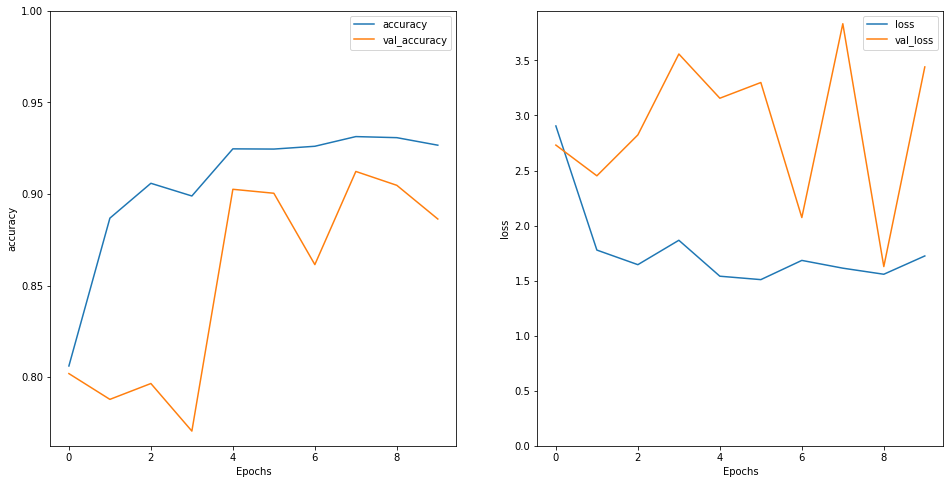

In [25]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graphs(history, 'loss')
plt.ylim(0,None)

In [27]:
model.save('/content/drive/MyDrive/Colab Notebooks/densenet.ipynb')

FailedPreconditionError: ignored